In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('dataset.csv')
print(data.head())
print(data.info())

   Unnamed: 0  x.radius_mean  x.texture_mean  x.perimeter_mean  x.area_mean  \
0           1         13.540           14.36             87.46        566.3   
1           2         13.080           15.71             85.63        520.0   
2           3          9.504           12.44             60.34        273.9   
3           4         13.030           18.42             82.61        523.8   
4           5          8.196           16.84             51.71        201.9   

   x.smoothness_mean  x.compactness_mean  x.concavity_mean  \
0            0.09779             0.08129           0.06664   
1            0.10750             0.12700           0.04568   
2            0.10240             0.06492           0.02956   
3            0.08983             0.03766           0.02562   
4            0.08600             0.05943           0.01588   

   x.concave_pts_mean  x.symmetry_mean  ...  x.texture_worst  \
0            0.047810           0.1885  ...            19.26   
1            0.031100   

In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Remove the unnamed column (serial number)
data = data.drop(data.columns[0], axis=1)
# Assuming the last column is the target variable, and all others are features
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # The last column
# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)
# Display basic information about the dataset
print(X.info())
print("\nTarget variable distribution:")
print(pd.Series(y).value_counts(normalize=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x.radius_mean        569 non-null    float64
 1   x.texture_mean       569 non-null    float64
 2   x.perimeter_mean     569 non-null    float64
 3   x.area_mean          569 non-null    float64
 4   x.smoothness_mean    569 non-null    float64
 5   x.compactness_mean   569 non-null    float64
 6   x.concavity_mean     569 non-null    float64
 7   x.concave_pts_mean   569 non-null    float64
 8   x.symmetry_mean      569 non-null    float64
 9   x.fractal_dim_mean   569 non-null    float64
 10  x.radius_se          569 non-null    float64
 11  x.texture_se         569 non-null    float64
 12  x.perimeter_se       569 non-null    float64
 13  x.area_se            569 non-null    float64
 14  x.smoothness_se      569 non-null    float64
 15  x.compactness_se     569 non-null    flo

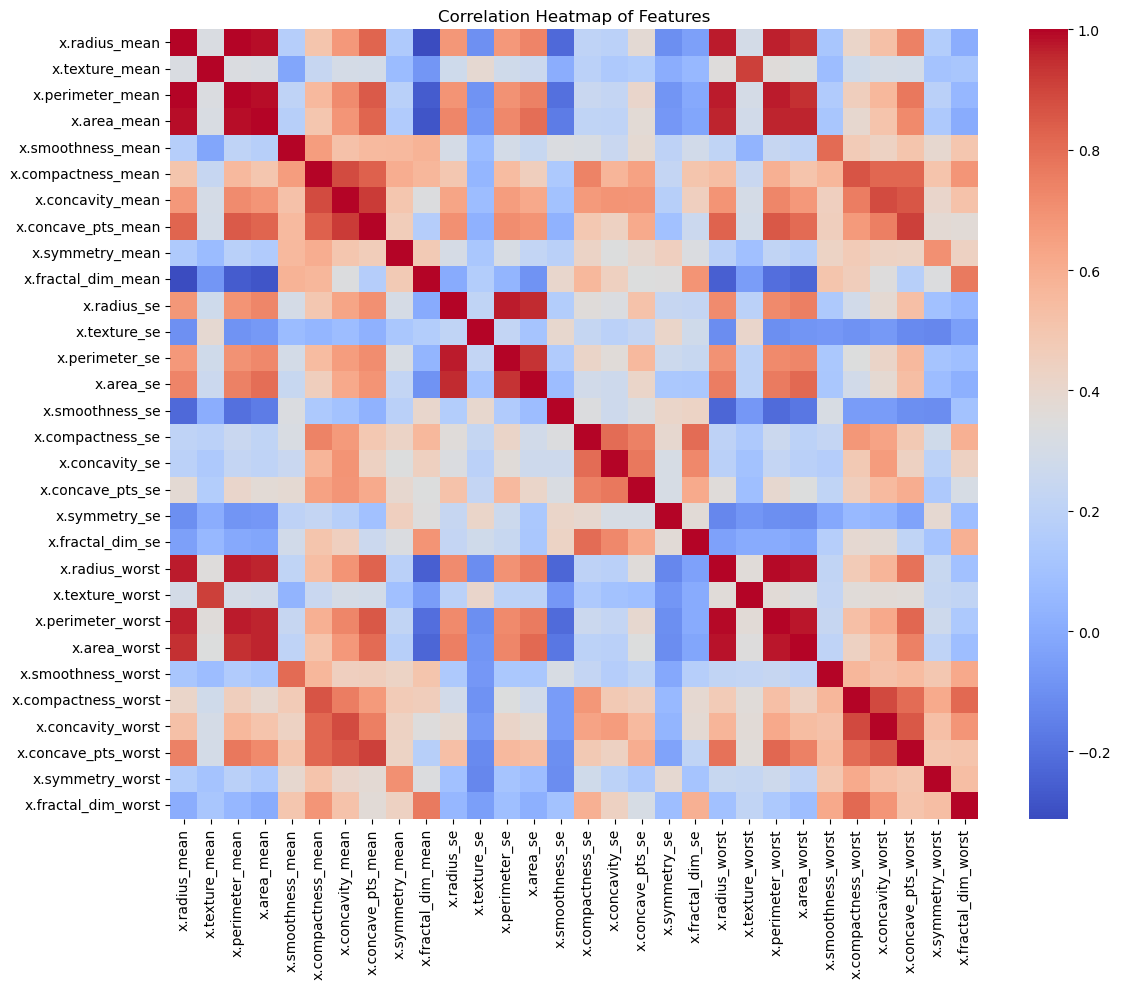

In [4]:
# Perform some exploratory data analysis
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()

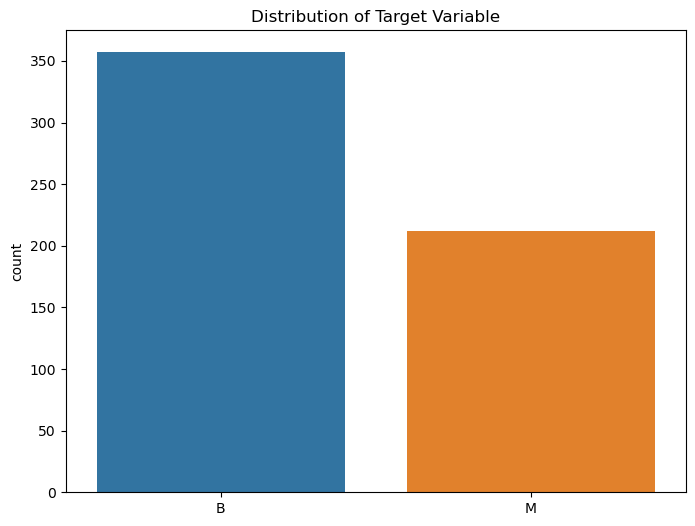

In [5]:
# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title("Distribution of Target Variable")
plt.xticks([0, 1], le.classes_)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
class CustomLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return np.column_stack((1 - y_predicted, y_predicted))

    def predict(self, X):
        return (self.predict_proba(X)[:, 1] > 0.5).astype(int)

    @property
    def coef_(self):
        return self.weights.reshape(1, -1)

In [8]:
# Use our custom model
model = CustomLogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train_scaled, y_train)

In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

In [10]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))



Confusion Matrix:
[[70  1]
 [ 3 40]]

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



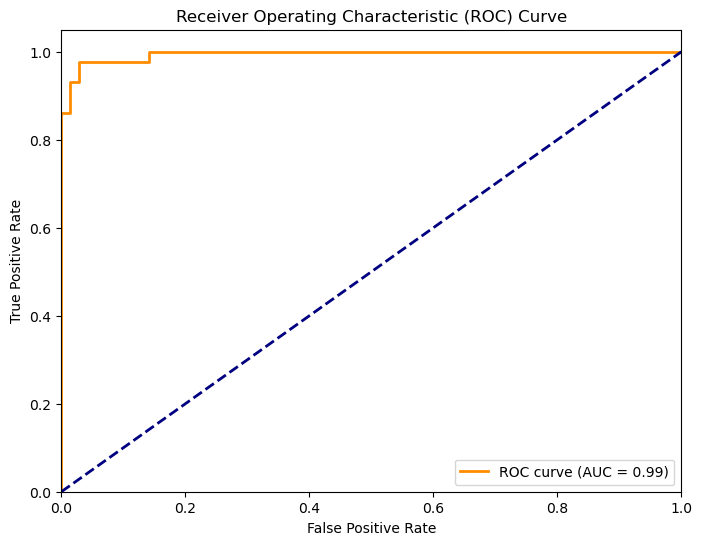

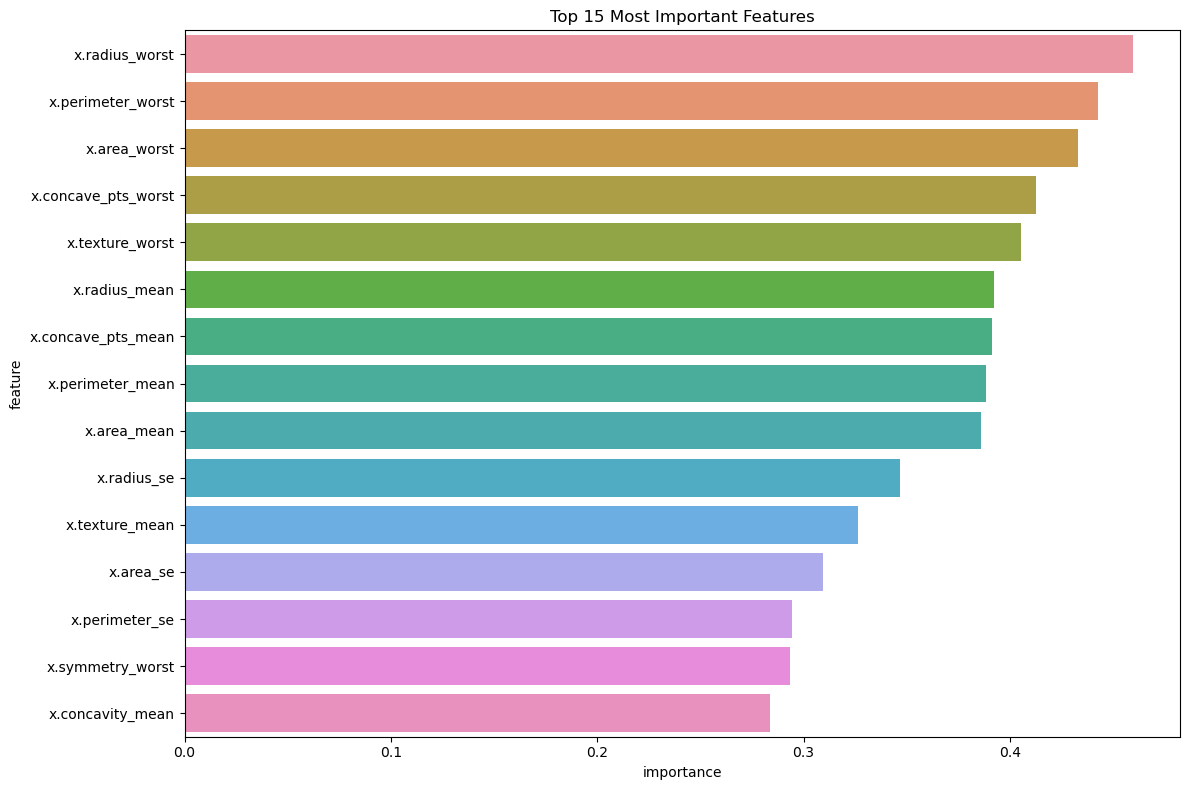


Top 10 Most Important Features:
                feature  importance
20       x.radius_worst    0.459477
22    x.perimeter_worst    0.442715
23         x.area_worst    0.432957
27  x.concave_pts_worst    0.412434
21      x.texture_worst    0.405342
0         x.radius_mean    0.392502
7    x.concave_pts_mean    0.391139
2      x.perimeter_mean    0.388408
3           x.area_mean    0.386065
10          x.radius_se    0.346937

Top 5 Features with Positive Influence:
                feature  coefficient
20       x.radius_worst     0.459477
22    x.perimeter_worst     0.442715
23         x.area_worst     0.432957
27  x.concave_pts_worst     0.412434
21      x.texture_worst     0.405342

Top 5 Features with Negative Influence:
               feature  coefficient
19    x.fractal_dim_se    -0.168730
9   x.fractal_dim_mean    -0.150049
16      x.concavity_se    -0.106381
15    x.compactness_se    -0.100522
14     x.smoothness_se    -0.057957

Target Variable Encoding:
B: 0
M: 1


In [11]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title("Top 15 Most Important Features")
plt.tight_layout()
plt.show()

# Print top 10 most important features
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Model interpretation
coefficients = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_[0]
})
coefficients = coefficients.sort_values('coefficient', key=abs, ascending=False)

print("\nTop 5 Features with Positive Influence:")
print(coefficients[coefficients['coefficient'] > 0].head())

print("\nTop 5 Features with Negative Influence:")
print(coefficients[coefficients['coefficient'] < 0].head())

# Print the encoding of target variable
print("\nTarget Variable Encoding:")
for i, class_name in enumerate(le.classes_):
    print(f"{class_name}: {i}")

In [ ]:
def get_patient_input():
    print("\nEnter patient data:")
    patient_data = {}
    for feature in X.columns:
        while True:
            try:
                value = float(input(f"Enter {feature}: "))
                patient_data[feature] = value
                break
            except ValueError:
                print("Please enter a valid number.")
    return patient_data

# Function to predict tumor type and probability
def predict_tumor(patient_data):
    # Convert patient data to numpy array
    patient_array = np.array(list(patient_data.values())).reshape(1, -1)
    
    # Scale the input data
    patient_scaled = scaler.transform(patient_array)
    
    # Make prediction
    probability = model.predict_proba(patient_scaled)[0]
    prediction = model.predict(patient_scaled)[0]
    
    tumor_type = le.inverse_transform([prediction])[0]
    tumor_prob = probability if tumor_type == 'M' else 1 - probability
    
    return tumor_type, tumor_prob

# Main interaction loop
while True:
    choice = input("\nDo you want to predict for a new patient? (yes/no): ").lower()
    if choice != 'yes':
        break
    
    patient_data = get_patient_input()
    tumor_type, tumor_prob = predict_tumor(patient_data)
    
    print(f"\nPrediction: The tumor is {tumor_type}.")
    print(f"Probability: {tumor_prob:.2%}")
    
    if tumor_type == 'M':
        print("The tumor is predicted to be Malignant.")
    else:
        print("The tumor is predicted to be Benign.")

print("Thank you for using the Breast Cancer Prediction model.")